In [1]:
import numpy as np
import random

In [2]:
# Initialize street
STREET_LENGTH = 120
street = -np.ones(STREET_LENGTH, dtype=np.byte)

# Make random cars on street
CAR_COUNT = 20
for i in range(CAR_COUNT):
    street[random.randint(0, STREET_LENGTH - 1)] = 0

In [3]:
def print_street(street):
    
    textual_representation = ""
    for i in range(len(street)):
        if street[i] < 0:
            textual_representation += "."
        else:
            textual_representation += str(street[i])
            
    print(textual_representation)
            
        
# street[5] = 1
# street[6] = 1
# street[15] = 0
print_street(street)

................0...0..0...0...0................0....0........0..0................0.00...0....00......0...............0.


In [4]:
MAX_SPEED = 8

def stopping_distance(speed, next_speed):
    if next_speed > speed:
        return 0
    n = 0
    for i in range(next_speed, speed + 1, 1):
        n += i
    return int(n)

MAX_FORESIGHT = stopping_distance(MAX_SPEED+1,0) + 1

NOTHING = 0
ACCELERATE = 1
DECCELERATE = 2

def get_most_restrictive_car(street, index, speed):
    min_stopping_dist = len(street)
    foresight = stopping_distance(speed, 0)
    
    for j in range(1, foresight + 1):
        if street[(index + j) % len(street)] >= 0:
            # We've found a car
            speed2 = street[(index + j) % len(street)]
            stopping_dist = stopping_distance(speed2, 0) + (j - 1)
            if stopping_dist < min_stopping_dist:
                min_stopping_dist = stopping_dist

    if min_stopping_dist >= foresight + speed + 1:
        return ACCELERATE
    elif min_stopping_dist < foresight:
        return DECCELERATE
    else:
        return NOTHING
    
                

def get_next_car(street, index):
    distance_to_next_car = MAX_FORESIGHT
    speed_of_next_car = MAX_SPEED
    for j in range(1, MAX_FORESIGHT):
        if street[(index + j) % len(street)] >= 0:
            distance_to_next_car = j - 1
            speed_of_next_car = street[(index + j) % len(street)]
            break
            
    return distance_to_next_car, speed_of_next_car
    

def tick(street):
    new_street = -np.ones(len(street), dtype=np.byte)
    for i in range(len(street)):
        if street[i] >= 0:
            # Found car
            speed = street[i]
            
            # Find next car ahead
            distance_to_next_car, speed_of_next_car = get_next_car(street, i)
            action =  get_most_restrictive_car(street, i, speed+1)
            
            new_speed = speed
            if action == ACCELERATE and speed < MAX_SPEED:
                # Press on accelerator
                new_speed += 1
            elif action == DECCELERATE:
                # Press on the brakes
                new_speed -= 1
            
            
            max_forward = min(speed, distance_to_next_car + speed_of_next_car)
            if max_forward < speed:
                # Rear end
                new_speed = 0
            
#             new_speed -= 1 if random.uniform(0.0, 1.0) < 0.10 else 0
            new_speed = max(0, min(new_speed, MAX_SPEED))
            new_street[(i + max_forward) % len(street)] = new_speed
            
    return new_street

print_street(street)
print_street(tick(street))
print_street(tick(tick(street)))
print_street(tick(tick(tick(street))))

................0...0..0...0...0................0....0........0..0................0.00...0....00......0...............0.
................1...1..1...1...1................1....1........1..1................1.01...1....01......1...............1.
.................2...1..2...2...2................2....2........1..2................00.2...2...0.2......2...............2
.3.................1..1...2...2...3................2....3.......1...3..............01...2...1.1...3......3..............


In [5]:
from IPython.display import clear_output
import time

st = street
for i in range(1000):
    if i < 25 or i > 50:
        st = tick(st)
    else:
        st[50] = 0
        st = tick(st)
        st[50] = 0
        
    print_street(st)

................1...1..1...1...1................1....1........1..1................1.01...1....01......1...............1.
.................2...1..2...2...2................2....2........1..2................00.2...2...0.2......2...............2
.3.................1..1...2...2...3................2....3.......1...3..............01...2...1.1...3......3..............
....4...............1..2....2...2....4...............3.....2.....2.....4...........0.2....1..0.2.....3......4...........
........5............1...2....2...3......5..............2....2.....3.......3.......1...1...0.1...3......4.......5.......
.............4........2....2....2....4........4...........2....3......3.......2.....2...2..1..2.....4.......5........6..
...5.............3......2....2....3......4........3.........3.....3......3......2.....2...1.1...3.......5........6......
........4...........2.....2....3.....4.......3.......4.........3.....3......2.....2.....1..0.2.....4.........6.........5
....4.......3.........2.....3...

.....3......2.....2.....2.....2.....2.....3.....3......3......3......3......3......3......3......3......3......3......3.
.3......2.....2.....2.....2.....2.....3......3.....3......3......3......3......3......3......3......3......3......3.....
....2.....2.....2.....2.....2.....3......3......3.....3......3......3......3......3......3......3......3......3......3..
2.....2.....2.....2.....2.....3......3......3......3.....3......3......3......3......3......3......3......3......3......
..2.....2.....2.....2.....3......3......3......3......3.....3......3......3......3......3......3......3......3......2...
....2.....2.....2.....3......3......3......3......3......3.....3......3......3......3......3......3......3......2.....2.
2.....2.....2.....3......3......3......3......3......3......3.....3......3......3......3......3......3......2.....2.....
..2.....2.....3......3......3......3......3......3......3......3.....3......3......3......3......3......2.....2.....2...
....2.....3......3......3......3

...2.....2.....2.....2.....2.....3......3......3......3......3......3......3.....3......3......3......3......3......3...
.....2.....2.....2.....2.....3......3......3......3......3......3......3......3.....3......3......3......3......3......2
.2.....2.....2.....2.....3......3......3......3......3......3......3......3......3.....3......3......3......3......2....
...2.....2.....2.....3......3......3......3......3......3......3......3......3......3.....3......3......3......2.....2..
.....2.....2.....3......3......3......3......3......3......3......3......3......3......3.....3......3......2.....2.....2
.2.....2.....3......3......3......3......3......3......3......3......3......3......3......3.....3......2.....2.....2....
...2.....3......3......3......3......3......3......3......3......3......3......3......3......3.....2.....2.....2.....2..
.....3......3......3......3......3......3......3......3......3......3......3......3......3......2....2.....2.....2.....2
.3......3......3......3......3..

..2.....3......3......3......3......3......3......3......3......3......3......3......3......3......2.....2.....2.....2..
....3......3......3......3......3......3......3......3......3......3......3......3......3......2.....2.....2.....2.....2
.3.....3......3......3......3......3......3......3......3......3......3......3......3......2.....2.....2.....2.....2....
....3.....3......3......3......3......3......3......3......3......3......3......3......2.....2.....2.....2.....2.....3..
3......3.....3......3......3......3......3......3......3......3......3......3......2.....2.....2.....2.....2.....3......
...3......3.....3......3......3......3......3......3......3......3......3......2.....2.....2.....2.....2.....3......3...
......3......3.....3......3......3......3......3......3......3......3......2.....2.....2.....2.....2.....3......3......3
..3......3......3.....3......3......3......3......3......3......3......2.....2.....2.....2.....2.....3......3......3....
.....3......3......3.....3......

In [6]:
stopping_distance(2,0)

3

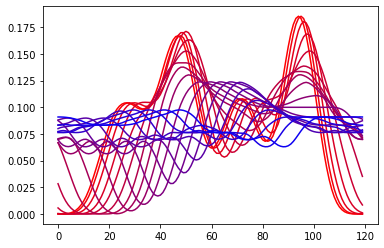

In [106]:
import matplotlib.pyplot as plt
import matplotlib
from scipy.ndimage import convolve

def get_density(street, smoothness=10):
    density = np.ones_like(street, dtype=np.float32) * (street != -1)
    smoothing_kernel = np.ones(smoothness) / smoothness
    density = convolve(density, smoothing_kernel, mode="wrap")
    density = convolve(density, smoothing_kernel, mode="wrap")
    density = convolve(density, smoothing_kernel, mode="wrap")
    density = convolve(density, smoothing_kernel, mode="wrap")
    return density

def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(matplotlib.colors.to_rgb(c1))
    c2=np.array(matplotlib.colors.to_rgb(c2))
    return matplotlib.colors.to_hex((1-mix)*c1 + mix*c2)

speeds = []
densities = []

st = street
LINES = 20
for i in range(LINES):
    
    c1='red' #blue
    c2='blue' #green
    
    for j in range(1):
        st = tick(st)
    den = get_density(st, smoothness=10)
    plt.plot(den, c=colorFader(c1,c2,(i/LINES)))
plt.show()

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random

def stopping_distance(speed, next_speed):
    if next_speed > speed:
        return 0
    n = 0
    for i in range(next_speed, speed + 1, 1):
        n += i
    return int(n)

MAX_SPEED = 10
MAX_FORESIGHT = int((MAX_SPEED * (MAX_SPEED - 1)) / 2)

NOTHING = 0
ACCELERATE = 1
DECCELERATE = 2

def get_most_restrictive_car(street, index, speed):
    min_stopping_dist = len(street)
    foresight = stopping_distance(speed, 0)
    
    for j in range(1, foresight + 1):
        if street[(index + j) % len(street)] >= 0:
            # We've found a car
            speed2 = street[(index + j) % len(street)]
            stopping_dist = stopping_distance(speed2, 0) + (j - 1)
            if stopping_dist < min_stopping_dist:
                min_stopping_dist = stopping_dist

    if min_stopping_dist > foresight:
        return ACCELERATE
    elif min_stopping_dist < foresight:
        return DECCELERATE
    else:
        return NOTHING
    
                

def get_next_car(street, index):
    distance_to_next_car = MAX_FORESIGHT
    speed_of_next_car = MAX_SPEED
    for j in range(1, MAX_FORESIGHT):
        if street[(index + j) % len(street)] >= 0:
            distance_to_next_car = j - 1
            speed_of_next_car = street[(index + j) % len(street)]
            break
            
    return distance_to_next_car, speed_of_next_car
    

class Lane:
    def __init__(self, cell_count=120, max_speed=8):
        self.cell_count = cell_count
        self.max_speed = max_speed
        self.street = -np.ones(self.cell_count, dtype=np.byte)
    
    def set_density(self, density, speed=2):
        assert(speed <= self.max_speed)
        accrual = 0.5
        for i in range(self.cell_count):
            accrual += density
            if random.random() < density:
                self.street[i] = speed
                accrual -= 1
                
    def print_street(self):
        textual_representation = ""
        for i in range(len(self.street)):
            if self.street[i] < 0:
                textual_representation += "."
            else:
                textual_representation += str(self.street[i])

        print(textual_representation)

    def tick(self):
        new_street = -np.ones(self.cell_count, dtype=np.byte)
        for i in range(self.cell_count):
            if self.street[i] >= 0:
                # Found car
                speed = self.street[i]

                # Find next car ahead
                distance_to_next_car, speed_of_next_car = get_next_car(self.street, i)
                action =  get_most_restrictive_car(self.street, i, speed+1)

                new_speed = speed
                if action == ACCELERATE and speed < self.max_speed:
                    # Press on accelerator
                    new_speed += 1
                elif action == DECCELERATE:
                    # Press on the brakes
                    new_speed -= 1


                max_forward = min(speed, distance_to_next_car + speed_of_next_car)
                if max_forward < speed:
                    # Rear end
                    new_speed = 0

                new_speed = max(0, min(new_speed, self.max_speed))
                new_street[(i + max_forward) % len(self.street)] = new_speed

        self.street = new_street
        
# plt.figure(figsize=(12,8))
        
# densities = np.arange(0.01, 0.5, 0.01)
# for density in tqdm(densities):
#     spes = []
#     for i in range(15):
#         st = Lane(cell_count=1000)
#         st.set_density(density)
#         for i in range(100):
#             st.tick()

#         speed = sum(st.street * (st.street != -1)) / (len(st.street) * density)
#         spes.append(speed)
        
#     speed = sum(spes) / len(spes)
#     plt.scatter(density, speed, c='blue', )
    
# plt.title("Car Speeds vs Density")
# plt.xlabel("Density [cars/cells]")
# plt.ylabel("Average Speed [cells/tick]")
# plt.show()

In [ ]:
class InputFlow:
    # 
    def __init__(self, input_lanes, output_lanes):